<a href="https://colab.research.google.com/github/SrinivasGuntupalli/DataScience/blob/master/EDA%20On%20Haberman%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting for Exploratory Data Analysis(EDA)

*   What is EDA? 

>In statistics,exploratory data analysis is an approach of analyzing data sets to summarize their main charecterstics,oofen using statistical graphics and other data visualization methods.

# Haberman Dataset 

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.

Attribute in this data set out of which 3 are features and 1 class attribute as 

### Attribute/Feature Information
  
1.   Age of a patient at the time of operation(numerical) patient's year of operation
2.   number of positve axillary nodes detected

3. Survival status(Class attribute) 1= Patient survived 5 years or longer. 2 = Patient died with in 5 years 
**Objective:** Classify Survival Status



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#loading a dataset from local system into Google Colab
from google.colab import files
files=files.upload()

Saving haberman.csv to haberman.csv


In [5]:
#Read/Load haberman.csv dataset into a pd dataframe
df=pd.read_csv('haberman.csv')
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
#Here verying the number of data-points(rows) and features(columns) in ourr loaded dataset
print(df.shape)

(306, 4)


In [9]:
#Here printing the column names in our loaded dataset
print(df.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [22]:
# Renaming the columns
df = df.rename(columns={"Age": "age", "Op_Year": "year", "axil_nodes": "nodes", "Surv_status": "status"})

In [26]:
# How many data-points present for each class
print(df["status"].value_counts())
print(df["age"].value_counts())
print(df["nodes"].value_counts())
# This will help you to know balanced or imbalanced dataset
# Here Haberman is not a balanced dataset as the number if data points for survived and unsurvived is not balanced

1    225
2     81
Name: status, dtype: int64
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64


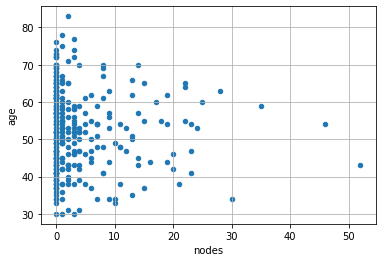

In [29]:
#2-D scatter plot
df.plot(kind='scatter', x='nodes', y='age');
plt.grid()
plt.show()

#Observation
Above scatter plot shows all data in overlap fashion and also in same colour due to which we are unable to distinguish between data and also there are possibilities that you may miss some of my data which may lead to wrong conclusion. So, to distinguish between the data we can use seaborn packages function which simply to distinguish data visually by allocating different colours to every classification feature.


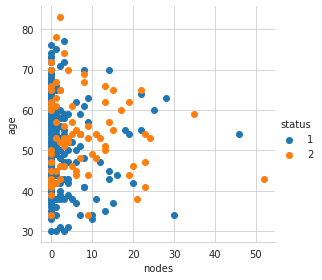

In [31]:
# 2-D scatter plot with color-coding
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
  .map(plt.scatter, "nodes", "age") \
  .add_legend();
plt.show();

# Notice that the blue points represents surviival more than 5 years and Orange dots represents surviival less than 5 years.

**Observations:**


1.   With age and nodes, we are not able to differentiate survival status and data points are overlapping 
2.   Thewre is max 0-10 nodes and moore data points are above 40 age.



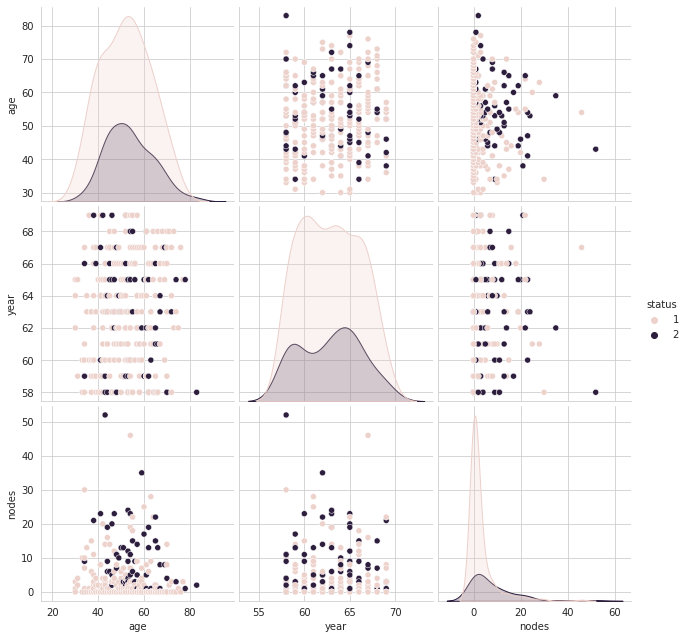

In [35]:
# Pair-plot
# Dis-Advantages:
## Can not be used when number of features are high
## Can not viisualize hiigher dimensional patterns in 3-D and 4-D

# Only possible to view 2D patterrns.

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=3);
plt.show()

# Note: The diagnol elements are PDFs for each feature, PDFs are explained below

**Observations:**
It seems there iis a strong relation between nodes and status and i would consider tthese 2 features for further analysis.

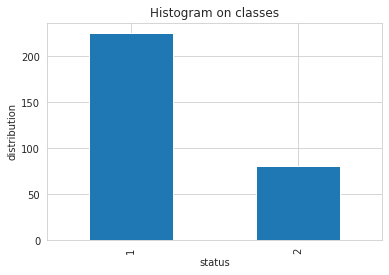

In [37]:
# Histogram, PDF and CDF
df_status = pd.value_counts(df["status"])
df_status.plot(kind = 'bar')
plt.title("Histogram on classes")
plt.xlabel("status")
plt.ylabel("distribution")
plt.show()

In [38]:
df_status.values

array([225,  81])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


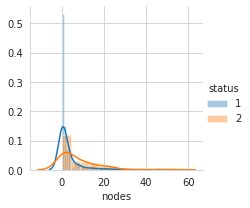

In [41]:
sns.FacetGrid(df, hue="status", height=3) \
  .map(sns.distplot, "nodes") \
  .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


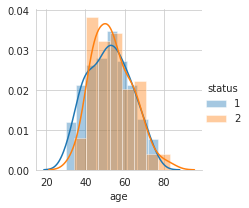

In [43]:
sns.FacetGrid(df, hue="status", height=3) \
  .map(sns.distplot, "age") \
  .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


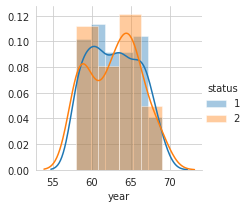

In [44]:
sns.FacetGrid(df, hue="status", height=3) \
  .map(sns.distplot, "year") \
  .add_legend();
plt.show();

**Observations:**
Histogram shows that how many columns have status 1 & 2
Distibution plot shows that PDFf on each feature. We can see that with age and year we can not diffferentiiatee status as iit hhas to much ooverlapping, only with nodes wee can conclude that if less nodes more survival and more nodes less survival.

In [46]:
status1 = df.loc[df["status"] == 1];
status2 = df.loc[df["status"] == 2];
print(status1)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
298   73    68      0       1
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1

[225 rows x 4 columns]


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


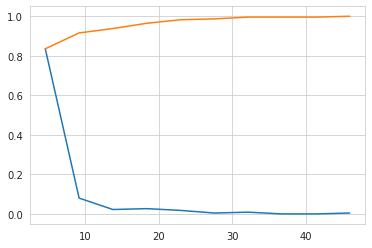

In [51]:
#CDF(Cumulative Distribution Function)

counts, bin_edges = np.histogram(status1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

CDF always lies between 0 and 1

there is a 80% chance of long survival if number of nodes detected less than 10 nodes.

Also PDF shows that if nodes increases survival chances reduce.
CDF shoows in detail view of PDF.

Soo the abooce diagram concludes that if nodes are more than 10 them very less chance of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


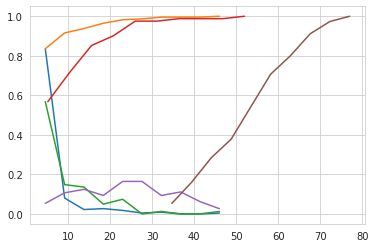

In [52]:
counts, bin_edges = np.histogram(status1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(status2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_eedges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(status1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_eedges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

In [54]:
# Mean, Variance and Std-dev
print("Means:")
print("survived")
print(np.mean(status1['age']))
print(np.mean(status1['year']))
print(np.mean(status1['nodes']))

print()

print("Not survived")
print(np.mean(status2['age']))
print(np.mean(status2['year']))
print(np.mean(status2['nodes']))

print()

print("std:")
print(np.std(df['age']))
print(np.std(df['year']))
print(np.std(df['nodes']))

Means:
survived
52.01777777777778
62.86222222222222
2.7911111111111113

Not survived
53.67901234567901
62.82716049382716
7.45679012345679

std:
10.78578520363183
3.244090833563246
7.177896092811152


In [57]:
print("\nMedians:")
print(np.median(df["age"]))
print(np.median(df["nodes"]))
print(np.median(df["year"]))

print("\nQuantiles:")
print(np.percentile(df["age"],np.arange(0, 100, 25)))
print(np.percentile(df["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df["year"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df["age"],90))
print(np.percentile(df["nodes"],90))
print(np.percentile(df["year"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(df["age"]))
print(robust.mad(df["nodes"]))
print(robust.mad(df["year"]))


Medians:
52.0
1.0
63.0

Quantiles:
[30.   44.   52.   60.75]
[0. 0. 1. 4.]
[58.   60.   63.   65.75]

90th Percentiles:
67.0
13.0
67.0

Median Absolute Deviation
11.860817748044816
1.482602218505602
4.447806655516806


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


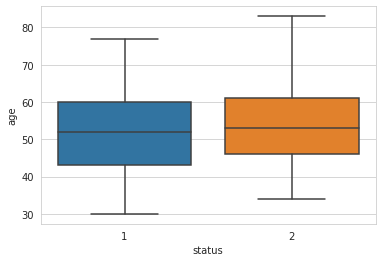

In [58]:
# Box plot and Whiskers
# Box-plot can bee viisualized as a PDF on the siide-ways

sns.boxplot(x='status', y='age', data=df)
plt.show()

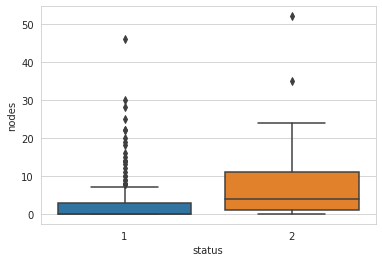

In [59]:
sns.boxplot(x='status', y='nodes', data=df)
plt.show()

**Observations**

This box plot also clearly tells the survival(1) has more spread when nodes less than 10 and Orange pllot shows noot survived if more nodes present

Using this we can see what iis median of nodes which has survival status 1 or 2 and all the percentiles(IQR)

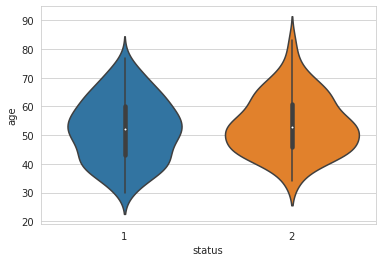

In [61]:
# Violin plots
sns.violinplot(x="status", y="age", data=df, size=8)
plt.show()

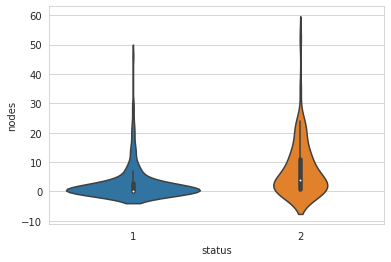

In [62]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.show()

**bservations**
1.   more density status 1 on 0-5 noodes
2.   another diagram shows that more density when noodes increases.




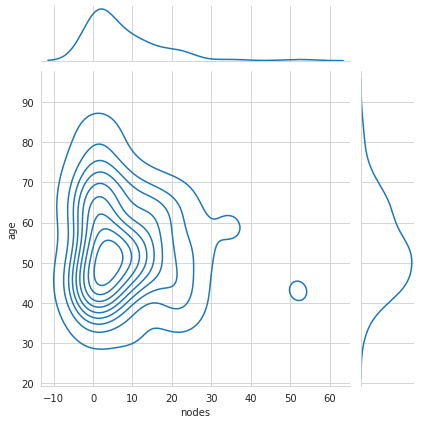

In [63]:
# Multivariate probability densiity, contour plot.
# 2D DENSITY PLOT, CONTORS-PLOT

sns.jointplot(x="nodes", y="age", data=status2, kind="kde");
plt.show();